<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/Make_circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow Keras ANN make_circles dataset

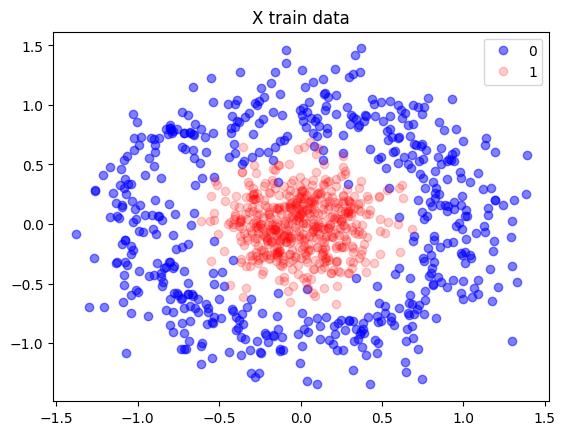

In [ ]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1500, noise=.2, factor=.2, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

import matplotlib.pyplot as plt
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ob', alpha=.5)
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'or', alpha=.2)
plt.legend(['0','1'])
plt.title('X train data')
plt.show()

In [ ]:
X_train.shape

(1050, 2)

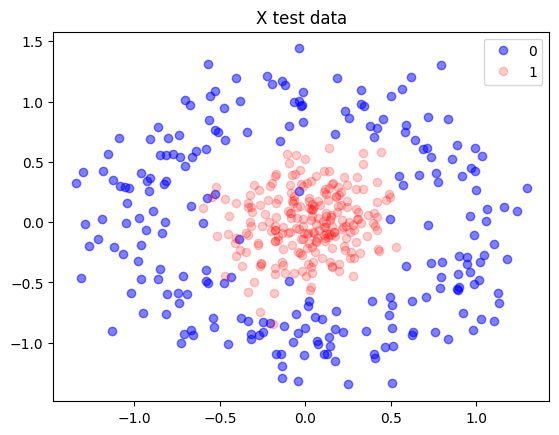

In [ ]:
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], 'ob', alpha=.5)
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], 'or', alpha=.2)
plt.legend(['0','1'])
plt.title('X test data')
plt.show()

In [ ]:
X_test.shape

(450, 2)

## Artifitial Neural Network Deep Model

In [ ]:
# clear the current Keras session.
from keras import backend as K
K.clear_session()

Build de model:
- Input layer: 2
- Hidden layer: 4 neurons, activation function 'tanh'
- Output layer: 1 neuron, activation function 'sigmoid'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Input((2,)))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile model with optimizer=SGD
model.compile(optimizer=SGD(learning_rate=0.5), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model
h = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5479 - loss: 0.7254
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 0.6445
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.5688
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8175 - loss: 0.4940
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - loss: 0.4219
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8830 - loss: 0.3456
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9308 - loss: 0.2884
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9541 - loss: 0.2221
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9701 - loss: 0.1877
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9661 - loss: 0.1615
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9705 - loss: 0.1451 
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9703 - l

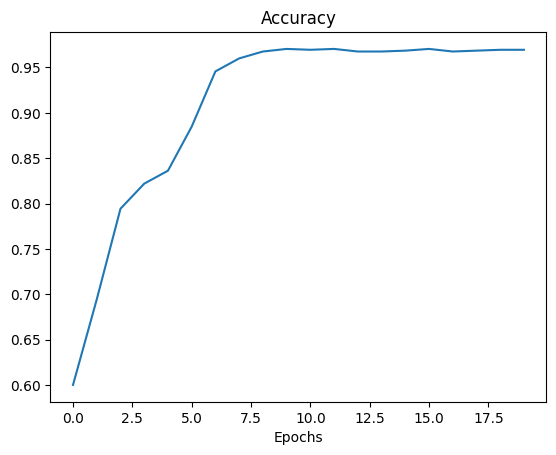

In [ ]:
# plot model accuracy
plt.plot(h.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show()

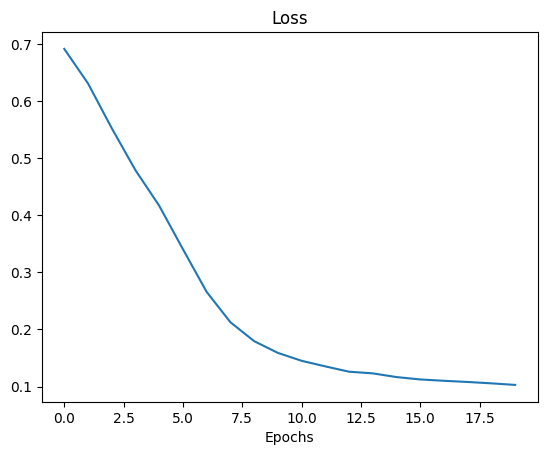

In [ ]:
# plot model loss function
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# make predictions
y_pred_ = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# as predições são valores reais de 0 a 1 --> sigmoid activation function
print('Max:', y_pred_.max(), ' Min:', y_pred_.min())

Max: 0.9926892  Min: 7.781994e-05


In [ ]:
y_pred_.shape

(450, 1)

In [ ]:
# aqui nós transformamos as predições em valores binários --> if y_train_pred > 0.5 == 1 else == 0
y_pred = (y_pred_ > 0.5).astype("int16").reshape(-1)
y_pred[:5]

array([1, 1, 0, 1, 1], dtype=int16)

In [ ]:
y_test.shape

(450,)

In [ ]:
y_pred.shape

(450,)

In [ ]:
# another way make the same
y_pred = []
for i in range(len(y_pred_)):
    if y_pred_[i] > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:5]

[1, 1, 0, 1, 1]

Number of wrong predictions: 24 



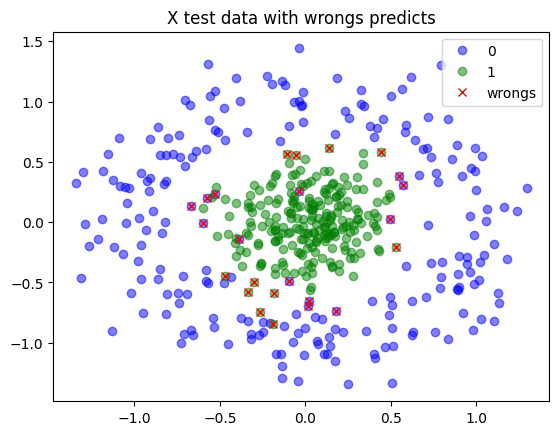

In [ ]:
# find wrongs predictions
X_wrongs = X_test[y_test!=y_pred,:]
print('Number of wrong predictions:', len(X_wrongs), '\n')
# plot
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], 'ob', alpha=.5)
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], 'og', alpha=.5)
plt.plot(X_wrongs[:,0], X_wrongs[:,1], 'xr')
plt.legend(['0','1', 'wrongs'])
plt.title('X test data with wrongs predicts')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(result)

Confusion Matrix:

[[213   8]
 [ 11 218]]


In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:\n",)
print (result1)

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       221
           1       0.96      0.95      0.96       229

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [ ]:
result2 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.1f}%".format(result2 * 100))

Accuracy: 95.8%


## Referências
[1] https://medium.com/@apokolipsu/compiling-the-ann-model-with-keras-1e7df90407a2

[2] https://keras.io/guides/sequential_model/

[3] https://www.tensorflow.org/tutorials/quickstart/beginner

[4] https://www.kaggle.com/code/nikhil25803/neural-network-classification-make-circles-data

[5] https://github.com/leriomaggio/deep-learning-keras-tensorflow/blob/master/1.%20ANN/1.1%20Introduction%20-%20Deep%20Learning%20and%20ANN.ipynb